# Diabetics Prediction using SVM

This is a machine learning project that predicts whether a person is diabetic or not based on various health parameters using Support Vector Machine (SVM) algorithm.
Objectives:
- Load and preprocess the dataset.
- Train an SVM model on the training data.
- Evaluate the model's performance on both training and testing data.
- Test the model with manual input data.
---

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Loading the Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Clearly, Outcome should be the target variable. 

As the values of the target variables is binary, this is a classification problem and thus, SVM is a suitable algorithm for this project/task. 

### Data Visualization

In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


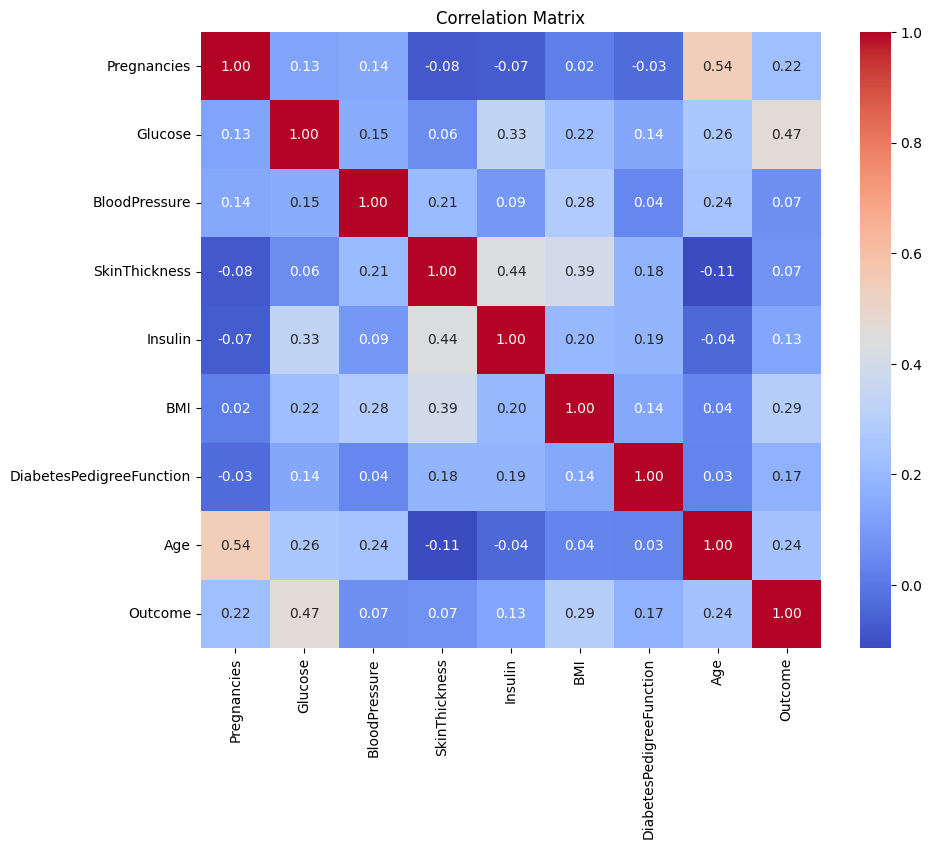

In [16]:
#  Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png', dpi=300) # Saves the image
plt.show()

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Allocating X and Y variables

In [7]:
X = df.drop(columns = 'Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Standardizing the Data

SVM is a distance-based algorithm. If features have different scales (e.g., Insulin vs. Age), the model will be biased towards features with higher magnitudes.
We use `StandardScaler` to transform the data so that all features have a mean of 0 and a standard deviation of 1.

In [9]:
scaler = StandardScaler()
scaler.fit(X)
std_data = scaler.transform(X)
X_std = std_data
X_std.shape

(768, 8)

### Train Test Split - 20% Test data

In [10]:
# Stratify=y ensures that both train and test sets have a balanced proportion of diabetic/non-diabetic cases
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y, random_state=2)
X_train.shape

(614, 8)

### Training the SVM Model

    Model Training
We are using the Support Vector Machine (SVM) Classifier.
* **Kernel:** We have chosen a `linear` kernel. This is computationally efficient and works well when the data is linearly separable.

In [11]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
X_train_pred = clf.predict(X_train)
train_acc = accuracy_score(X_train_pred, y_train)
train_acc

0.7866449511400652

In [13]:
X_test_pred = clf.predict(X_test)
test_acc = accuracy_score(X_test_pred, y_test)
test_acc

0.7727272727272727

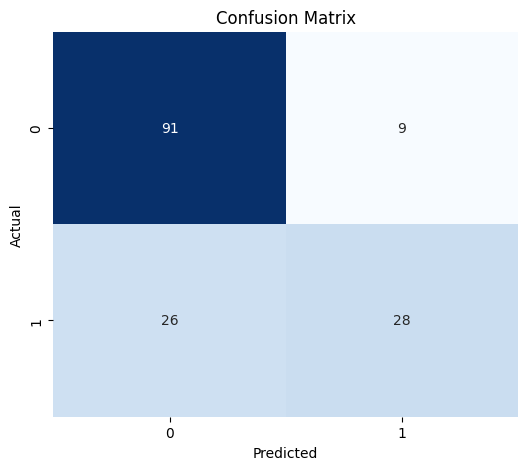

In [ ]:
#  Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, X_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300) # Saves the image
plt.show()

    Model Evaluation
* **Training Accuracy:** ~78%
* **Test Accuracy:** ~77%

**Conclusion:** The accuracy scores for training and testing are very close, which suggests the model is **generalized well** and is not suffering from overfitting.

### Testing for Manual Inputs

In [15]:
# Manual Data Input
input_sample = (5, 166, 72, 19, 175, 22.7, 0.6, 51)

# 1. Prepare Data
input_data = pd.DataFrame([input_sample], columns=X.columns)
manual_std = scaler.transform(input_data)

# 2. Predict
prediction = clf.predict(manual_std)

# 3. Output Result
if prediction[0] == 0:
    print("Result: Non-Diabetic")
else:
    print("Result: Diabetic")

Result: Diabetic




---

